# Planteamiento del Problema

Para que las empresas se vuelvan competitivas y disparen su crecimiento, necesitan aprovechar lo que la Inteligencia Artificial y Machine Learning pueda aportar para desarrollar modelos predictivos basados en pronosticar las ventas en el futuro.

Los modelos predictivos intentan pronosticar estas ventas basados en datos históricos, al tiempo que, tienen en cuenta los efectos de la estacionalidad, la demanda, las vacaciones, promociones y competencia.

Para este caso de estudio la empresa que solicita crear un modelo de predicción ha proporcionado datos del departamento de ventas de 1115 tiendas.

Dataset relacionado con las ventas:

* Id:  ID de transacción (combinación de la tienda y la fecha)
* Store: identificador único de la tienda
* Sales: ventas diarias, esta es la variable objetivo
* Customers: número de clientes de un día dado
* Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
* Promo: describe si la tienda tenía algún tipo de promoción ese día o no
* StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua (semana santa), c = Navidades, 0 = No era festivo)
* SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas

Dataset relacionado con las tiendas:

* StoreType: categoría que indica el tipo de tienda (a, b, c, d)
* Assortment:  a = básico, b = extra, c = extendido
* CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
* CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
* Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
* Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
* PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda

Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data


# Importando Librerías y datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')

import datetime

**Dataset de Ventas**

In [4]:
sales_train_df = pd.read_csv('train.csv', low_memory=False)
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Algunos puntos:

* Más de un millón de observaciones.
* No aparece datos nulos.
* Las columnas con fechas están en formato Object por lo que es necesario cambiarlos a datetime.

In [6]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


* Cantidad de ventas promedio por día = 5773 euros, ventas mínimas por día = 0 euros, ventas máximas por día = 41551 euros.
* Número medio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388.

**Dataset de las tiendas**

In [8]:
stores_df = pd.read_csv('store.csv')
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Puntos a destacar:

* El número total de tiendas son 1115.
* Existen datos nulos los cuales se necesitan tratar.

In [10]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


* La media de distancia en la que se encuentra una tienda de la competencia es de 5404 m.
* Hay tiendas que no aplican promociones, por lo que las columnas relacionadas con la fecha de aplicación sería Nan. Es necesario trabajar con ello.

# Análisis exploratorio de datos

## Dataset de Ventas

**Datos Nulos**

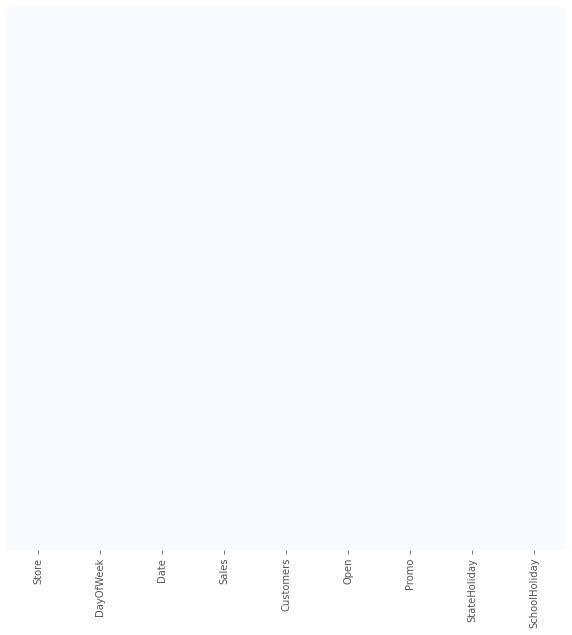

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

En el dataset de ventas no tenemos datos nulos

**Distribución de las variables**

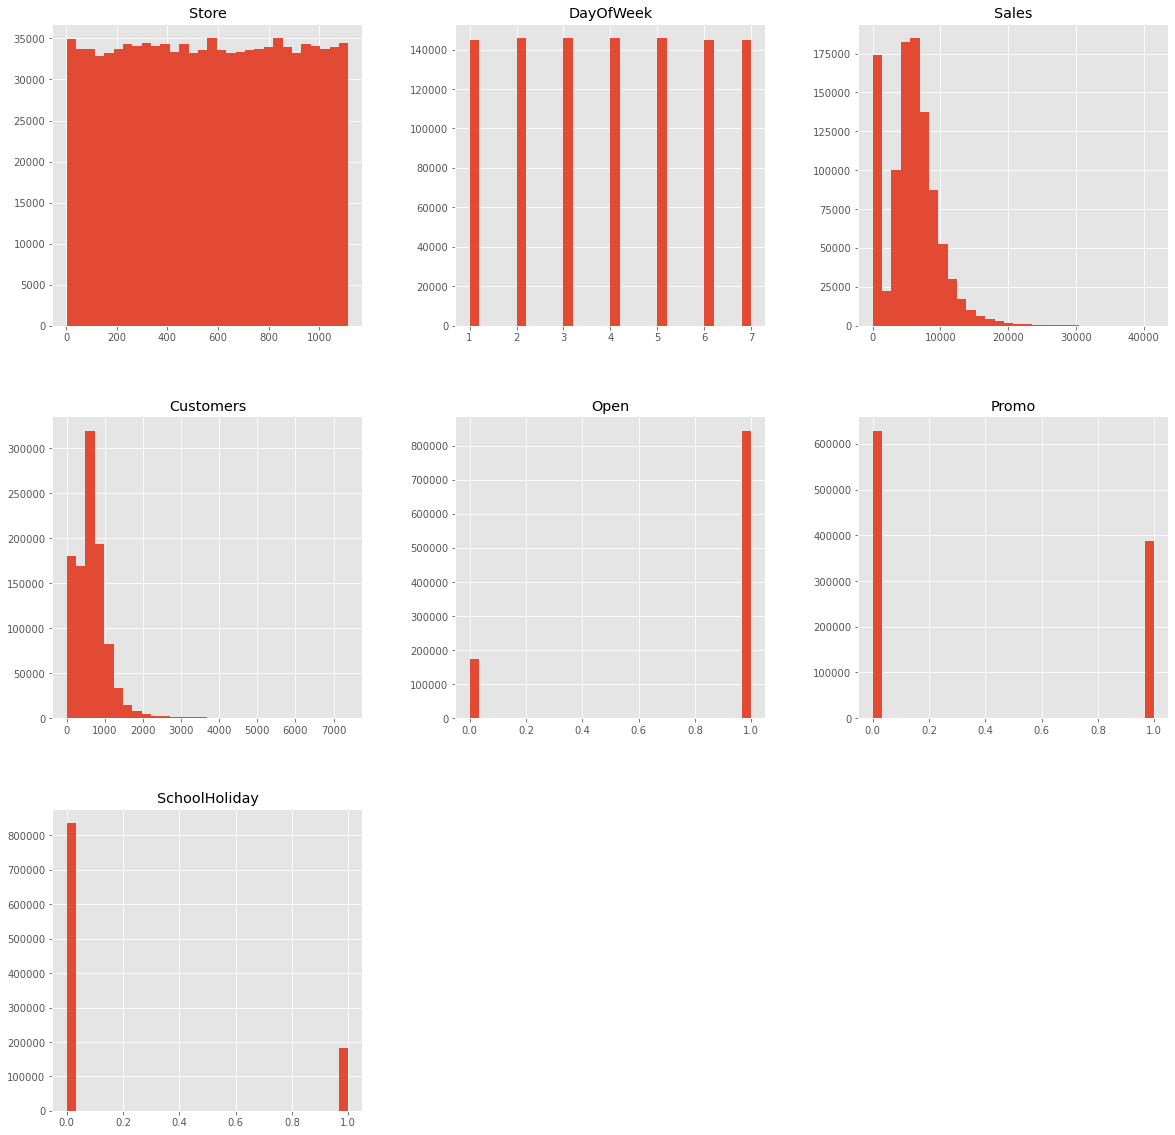

In [12]:
sales_train_df.hist(bins=30, figsize=(20,20))
plt.show()

Algunos puntos importantes a destacar con los histogramas pintados anteriormente:

* Promedio de 600 clientes por día. 
* Los datos se distribuyen por igual en varios días de la semana (~ 150000 observaciones x 7 días = ~ 1,1 millones de observaciones).
* Las tiendas están abiertas ~ 80% del tiempo
* Los datos se distribuyen por igual entre todas las tiendas (sin sesgo).
* La promoción # 1 se ejecutó aproximadamente el 40% del tiempo.
* Ventas promedio alrededor de 5000-6000 euros
* Las vacaciones escolares duran alrededor del 18% del tiempo.

**Analizando los días de vacaciones**

Cuando una tienda está cerrada, por lógica la facturación en ese día es de $0 euros, por lo que, para el modelo que se aplicará, es irrelevante este dato.

Pero, porque la tienda decide cerrar en un determinado día. Existe la posibilidad de que las tiendas cierren los mismos días donde existe vacaciones en las escuelas.

In [13]:
sales_train_df_open = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df_close = sales_train_df[sales_train_df['Open'] == 0]

print('Abierto: {} días, Cerrado: {} días'.format(len(sales_train_df_open), len(sales_train_df_close)))
print('Porcentaje de días cerrado: {}%'.format(round((len(sales_train_df_close)/len(sales_train_df)*100),2)))

Abierto: 844392 días, Cerrado: 172817 días
Porcentaje de días cerrado: 16.99%


 Con estos datos, nos quedamos solamente con los días donde las tiendas están abiertas. El objetivo del algoritmo será predecir la facturación total en un día determinado, por lo que, si la tienda está cerrada, su facturación es cero.

In [14]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

Ahora que nos quedamos solo con los días donde la tienda está abierta la columna open ya no tiene sentido, por lo que se procede a ser eliminada.

In [15]:
sales_train_df.drop(['Open'], axis=1, inplace=True)
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [16]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Algunas estadísticas han cambiado devido a que la columna Open ha sido eliminada:

* Ventas promedio = 6955 euros (ha incrementado).
* Número promedio de clientes = 762 (ha subido).

## Dataset de Tiendas

**Datos Nulos**

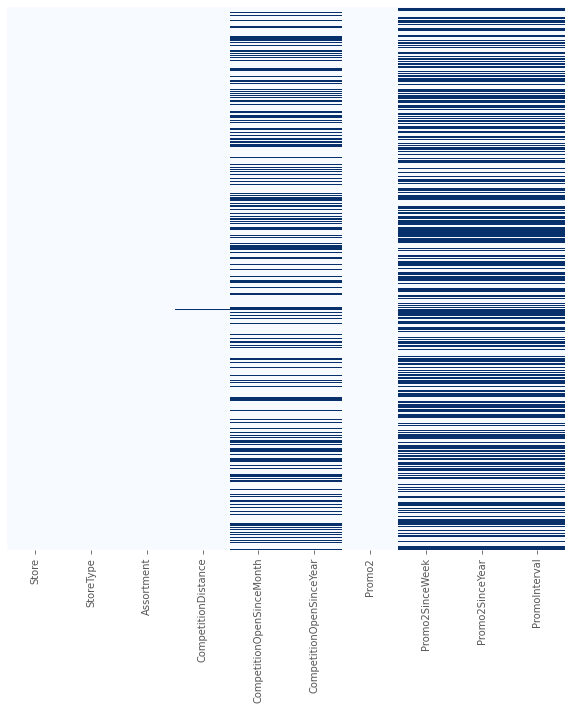

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(stores_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

En comparación con el otro dataset, en este si tenemos datos nulos, por lo que toca inferir como rellenarlos o si los vamos a eliminar.

**Competition Distance**

In [18]:
stores_df[stores_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Solo tres tiendas tienen faltante la distancia del competidor.

**Competition Open Since Month**

In [19]:
stores_df[stores_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


En esta columna tenemos 354 datos nulos.

**Competition Open Since Year**

In [20]:
stores_df[stores_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Al igual que Competition Open Since Month, Competition Open Since Year tiene 354 datos nulos. Posiblemente, las mismas filas que Competition Open Since Month.

**Promo 2**

Tenemos algo que analizar, en las columnas de Promo2 donde hay datos nulos, los más probable es porque las tiendas no aplican la Promo2, por lo que no existe información de Promo2 Since Week, Promo2 Since Year y PromoInterval.

In [21]:
stores_df[stores_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Efectivamente, donde Promo2 es 0, es decir, la tienda no aplica la promoción, las tres últimas columnas no tienen información.

Ahora que tenemos claro el porqué de los valores nulos, es tiempo de decidir qué hacer con ellos.

En este caso, no podemos proceder a simplemente eliminarlos, esto porque la cantidad es elevada y nos quedaríamos solo con pocos datos.

Los que se hará es cambiar todos los datos nulos por 0.

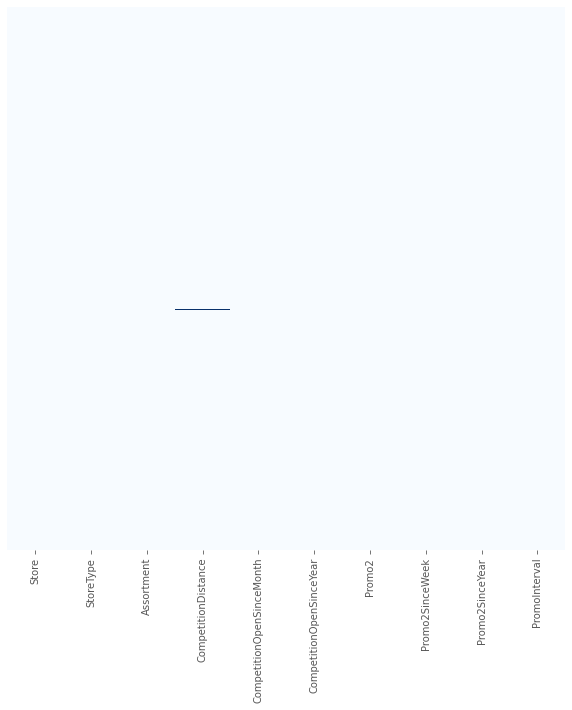

In [22]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear']

for col in str_cols:
    stores_df[col].fillna(0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(stores_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

Hemos trabajado con la mayoría de los datos nulos, solo quedan los de Competition Distance.

Estos datos los vamos a trabajar diferente, no podemos colocarle una distancia de 0, porque por sentido común no existe un competidor con distancia 0.

En este caso los vamos a rellenar con la media de la columna.

In [23]:
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].mean(), inplace=True)

Nos aseguramos que realmente ya no tengamos datos nulos.

In [24]:
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Distribución de las variables**

Ahora que ya no tenemos nulos pintaremos un histograma de cada variable para visualizar la distribución.

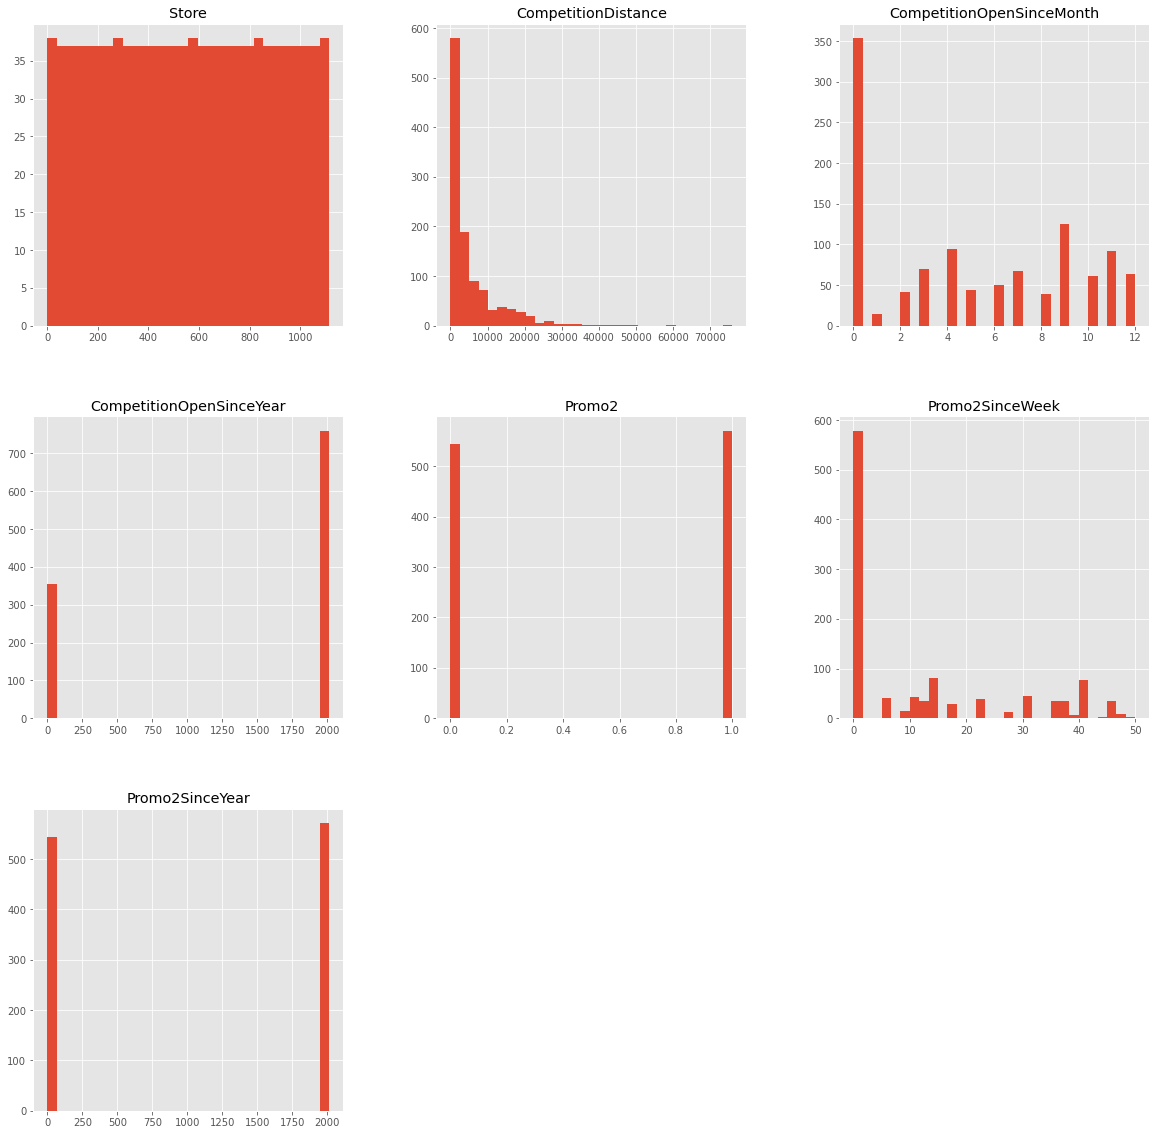

In [25]:
stores_df.hist(bins=30, figsize=(20,20))
plt.show()

* La mitad de las tiendas participan en la promoción 2.
* La mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia).

## Dataset combinado.

Ahora que ya tenemos limpio ambos datasets, es hora de combinarlos, ambos dataset comparte información respecto al ID de la tienda, por lo que procederemos a hacer un merge respecto a esa columna

In [26]:
sales_train_all_df = pd.merge(sales_train_df, stores_df, how='inner', on='Store')
sales_train_all_df.shape

(844392, 17)

Nos quedamos con un dataframe con 17 columnas y 844392 datos.

Procederemos a guardar este dataframe.

In [28]:
sales_train_all_df.to_csv('test.csv', index=False)

Ahora en adelante, trabajaremos con este dataset guardado.

In [29]:
sales_train_all_df = pd.read_csv('test.csv')
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


**Correlación entre las variables**

In [30]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

* Los clientes y la promoción se correlacionan positivamente con las ventas.
* Promo2 no parece ser efectivo en absoluto. Tiene correlación negativa respecto a las ventas.
* Las Promo, que son promociones aplicadas en solo un día, si parece tener correlación positiva, por lo que aumenta la facturación de ventas.

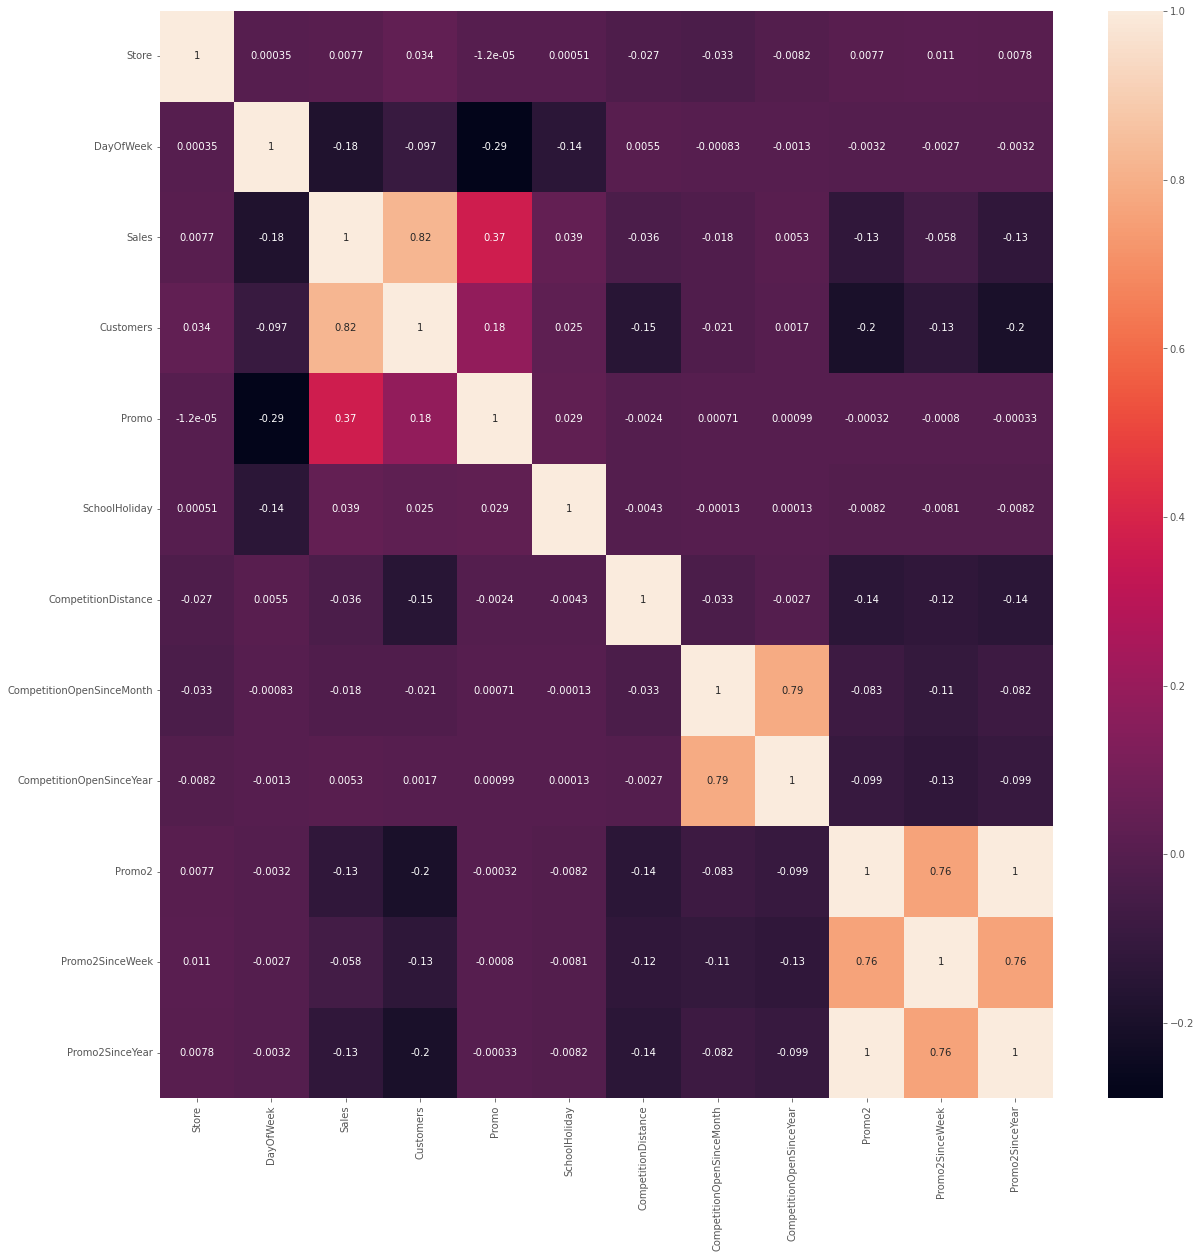

In [31]:
correlations_all = sales_train_all_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations_all, annot=True)
plt.show()

Al analizar el gráfico de correlaciones nos encontramos:

* Una correlación entre la Promo2 y Promo2 Since Year y Week. Esto no aporta nada, porque en la práctica si existe Promo 2, existe en la misma proporción los otros dos campos.

* Lo mismo sucede con Competition Open Since (Year and Month).

* Donde si existe correlación es en las variables ya analizadas anteriormente, la de Promo con Ventas y la de Customers con Ventas.


**Trabajando con fechas**

La columna fecha está en formato completo, por lo que añadiremos una columna para el día, otra para el mes y otra para el año.

Esto también nos ayudará al momento de modelizar el algoritmo de serie de tiempo para predecir las ventas.

In [32]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month 
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day 

sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


**Analizando las ventas respecto al tiempo**

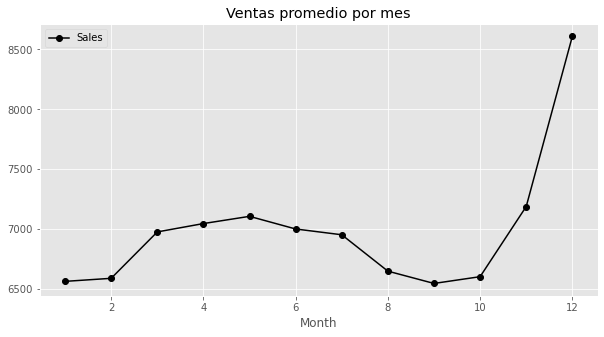

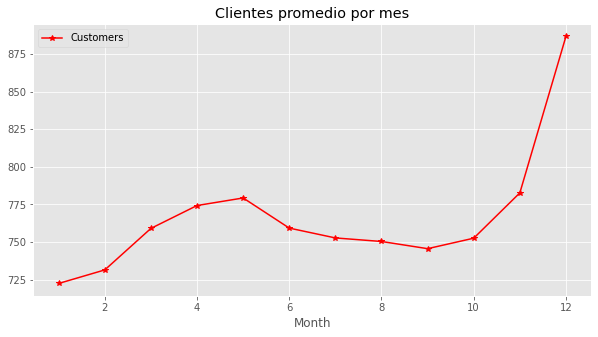

In [33]:
# Promedio de ventas mensual
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5),
                                                                  marker='o', color='k')
plt.title('Ventas promedio por mes')

# Promedio de clientes por mes
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5),
                                                                  marker='*', color='r')
plt.title('Clientes promedio por mes')
plt.show()

La gráfica de ventas es clara y podemos concluir en lo siguiente:

* Al inicio del año las ventas son bajas, esto podría deberse a la cuesta de Enero.
* Conforme el año avanza las ventas incrementan, esto hasta el mes 7.
* Después del mes 7 y hasta el 10, vemos la tendencia a la baja. Esto pueda deberse a que los clientes ahorren para las fiestas de fin de año.
* A partir del mes 10 las ventas incrementan exponencialmente, estos dos meses son donde se registra la mayor cantidad.

En la segunda gráfica se ve la correlación que tiene la variable Clientes con las Ventas.

Vemos la misma tendencia en ambos.

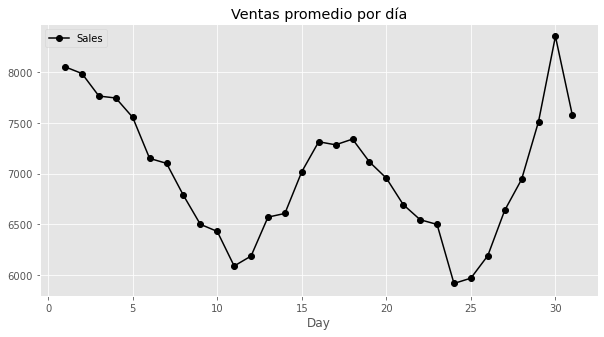

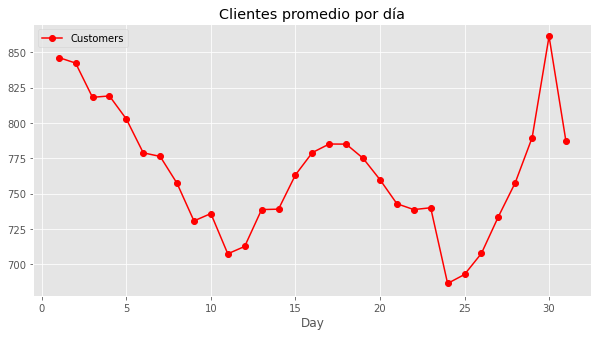

In [34]:
# Promedio de ventas por día
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5),
                                                                  marker='o', color='k')
plt.title('Ventas promedio por día')

# Promedio de clientes por día
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5),
                                                                  marker='o', color='r')
plt.title('Clientes promedio por día')
plt.show()

Podemos ver algo interesante en este gráfico.

* La tendencia de ventas parece ser que se correlaciona con el pago de quincena de los clientes, Al final-Inicio del mes, las ventas son altas. De igual maneta a mediados del mes (día 15). Pero las semanas entre medio, las ventas bajan.

Respecto a los clientes (Segundo gráfico) vemos la misma tendencia.

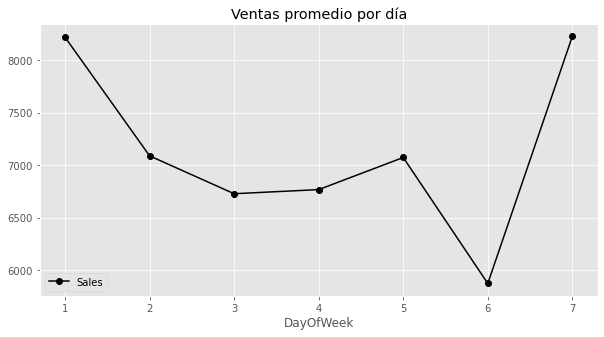

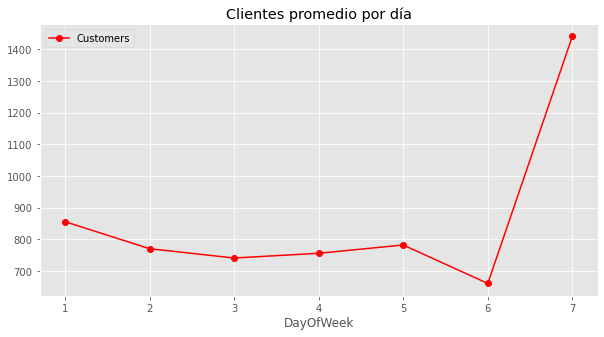

In [35]:
# Promedio de ventas por día de la semana
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5),
                                                                  marker='o', color='k')
plt.title('Ventas promedio por día')

# Promedio de clientes por día de la semana
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5),
                                                                  marker='o', color='r')
plt.title('Clientes promedio por día')
plt.show()

Claramente se ve que la mayor actividad se observa en el último día de la semana.

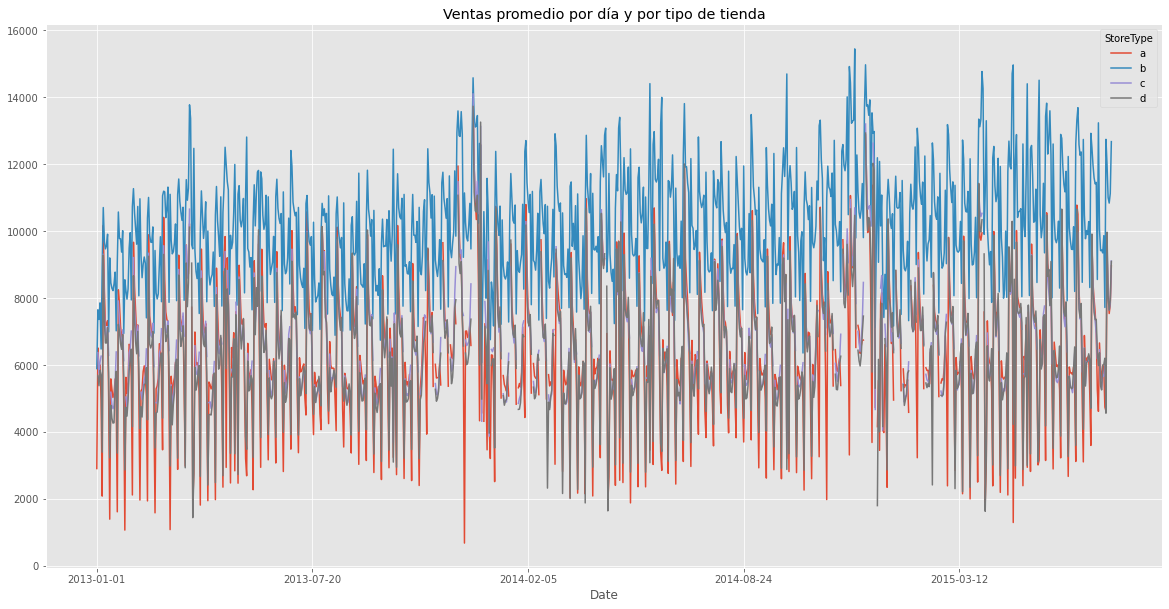

In [36]:
# Verificando las ventas por tipo de tienda
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)
plt.title('Ventas promedio por día y por tipo de tienda')
plt.show()

La tienda de tipo b es la que registra la mayor cantidad de ventas

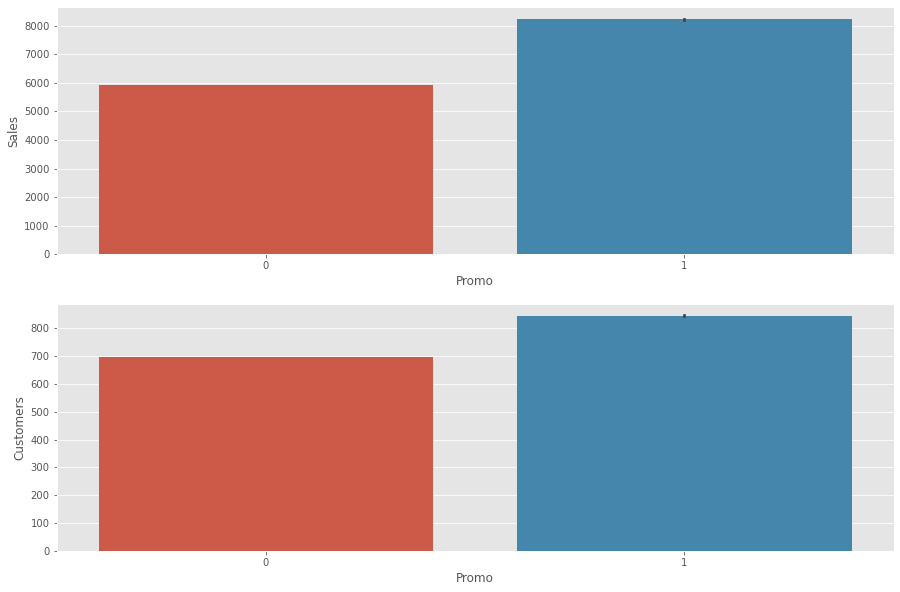

In [37]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df)

plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=sales_train_all_df)

plt.show()

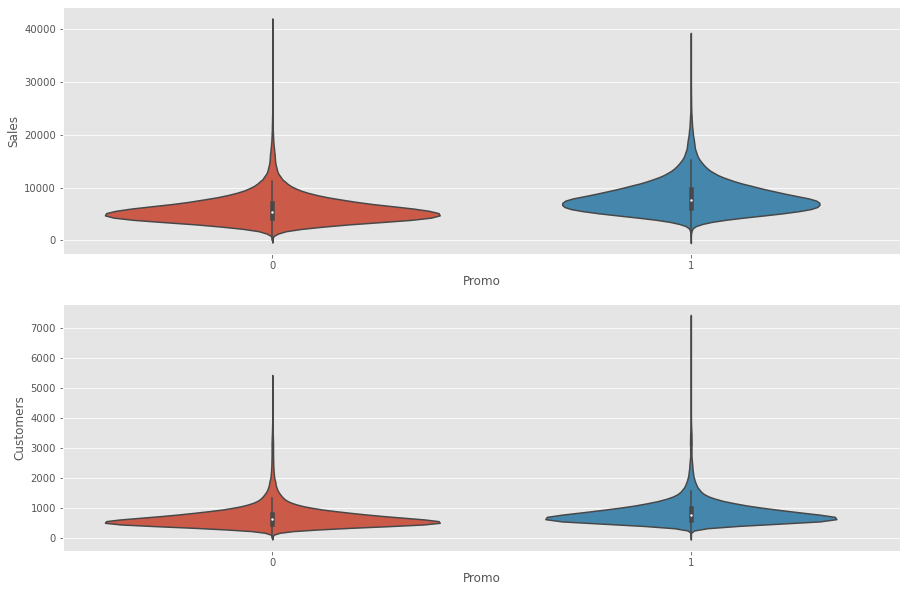

In [38]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=sales_train_all_df)

plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=sales_train_all_df)

plt.show()

Cuando hay promo, claramente se ve un aumento en las ventas y los clientes.

# Entrenamiento del Modelo

Para este caso de estudio utilizaremos una librería propia de Facebook llamada Fecebook Profhet, esta librería es especializada en modelos de series de tiempo, por lo que es la mejor herramienta que se puede utilizar para predecir las ventas.

In [39]:
from fbprophet import Prophet

El algoritmo de Facebook Prophet requiere que las columnas que estarán sujetas al modelo se renombren a $ds$ aquellas relacionadas con fechas, y $y$, a la variable a predecir.

In [55]:
def sales_predictions(store_id, sales_df, period):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model = Prophet(daily_seasonality=True)
    model.fit(sales_df)

    future = model.make_future_dataframe(periods=period)
    forecast = model.predict(future)

    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

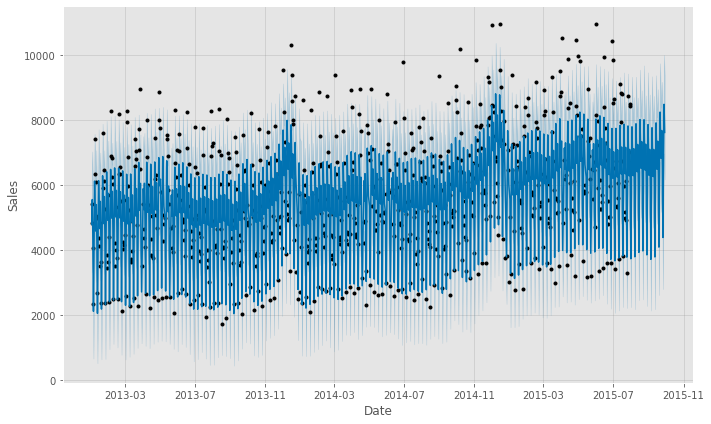

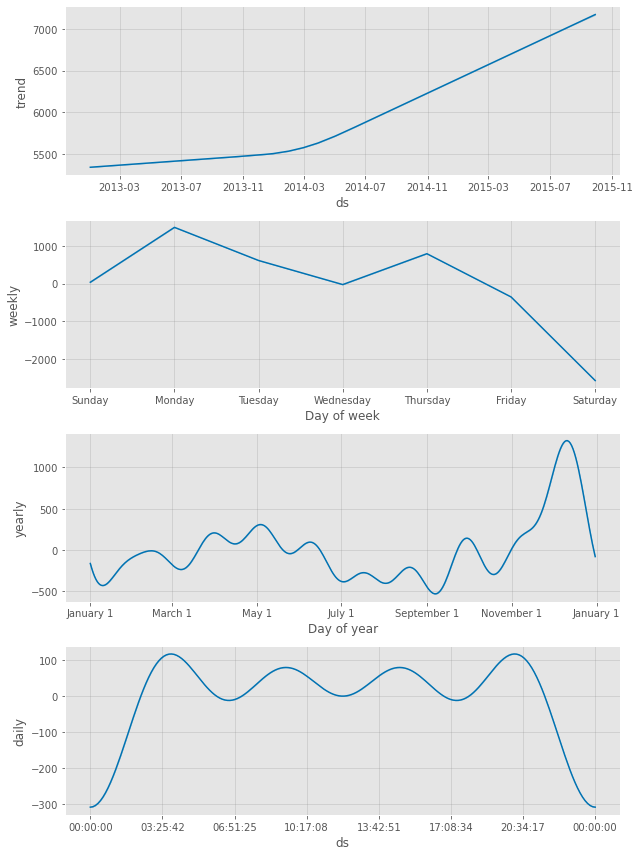

In [56]:
df = sales_predictions(8, sales_train_all_df, 60)

Una vez aplicado el algoritmo a una determinada tienda podemos obtener las gráficas que ayuden a tomar decisiones:

* La primera gráfica: Los puntos son los datos reales, las líneas azules son las predicciones dadas por intervalos de confianza, donde, entre más clara la línea, más probabilidades existe que el total de ventas en ese día caiga en el intervalo. En la parte final de la gráfica no contamos con puntos negros. Este es el periodo de predicción que nos hace el algoritmo, es decir, predice lo que puede llegar a pasar en el futuro, dado por el periodo que el usuario requiera.

* La segunda gráfica nos muestra la tendencia: En esta tienda la tendencia es positiva, lo que quiere decir es que las ventas se han incrementado con el paso del tiempo.

* La tercera y cuarta gráfica también nos muestra tendencia. Esta tendencia es relacionada con las ventas por mes y por semana, como se comporta cada mes y cada día respectivamente.

## Agregando la variable vacaciones

In [57]:
def sales_predictions(store_id, sales_df, holidays, period):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model = Prophet(holidays=holidays, daily_seasonality=True)
    model.fit(sales_df)

    future = model.make_future_dataframe(periods=period)
    forecast = model.predict(future)

    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

En nuestro dataset tenemos dos variables relacionadas a vacaciones:

* StateHolidays: Indican si un día es festivo o no:
  - a: Vacaciones públicas.
  - b: Vacaciones de Pascua.
  - c: Vacaciones de Navidad.
  - d: No es festivo

* ShoolHoliday: Indica si la tienda se ve afectada por el cierre de escuelas.

In [45]:
# Nos quedamos con fechas donde las tiendas se ven afectadas por las vacaciones
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1] \
  .loc[:, 'Date'].values

school_holidays.shape

(163457,)

In [46]:
# Nos quedamos solo con las fechas únicas
school_holidays = np.unique(school_holidays)

In [47]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c') |
                                    (sales_train_all_df['StateHoliday'] == 'd')] \
  .loc[:, 'Date'].values

state_holidays.shape

(910,)

In [48]:
# Nos quedamos solo con las fechas únicas
state_holidays = np.unique(state_holidays)

Creamos los dataset respectivo para cada tipo de vacaciones.

In [49]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [50]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                                'holiday': 'state_holiday'})
state_holidays.head()

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday


In [51]:
school_state_holidays = pd.concat((state_holidays, school_holidays), axis=0)

Ya que tenemos el dataset de las vacaciones, procedemos a entrenar un modelo que tome en cuenta estos datos.

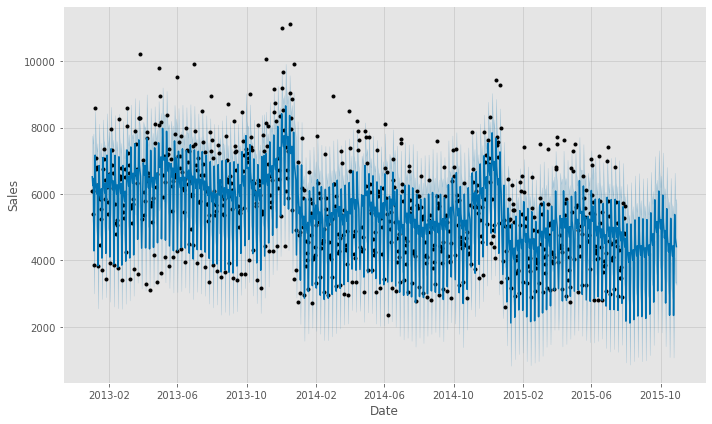

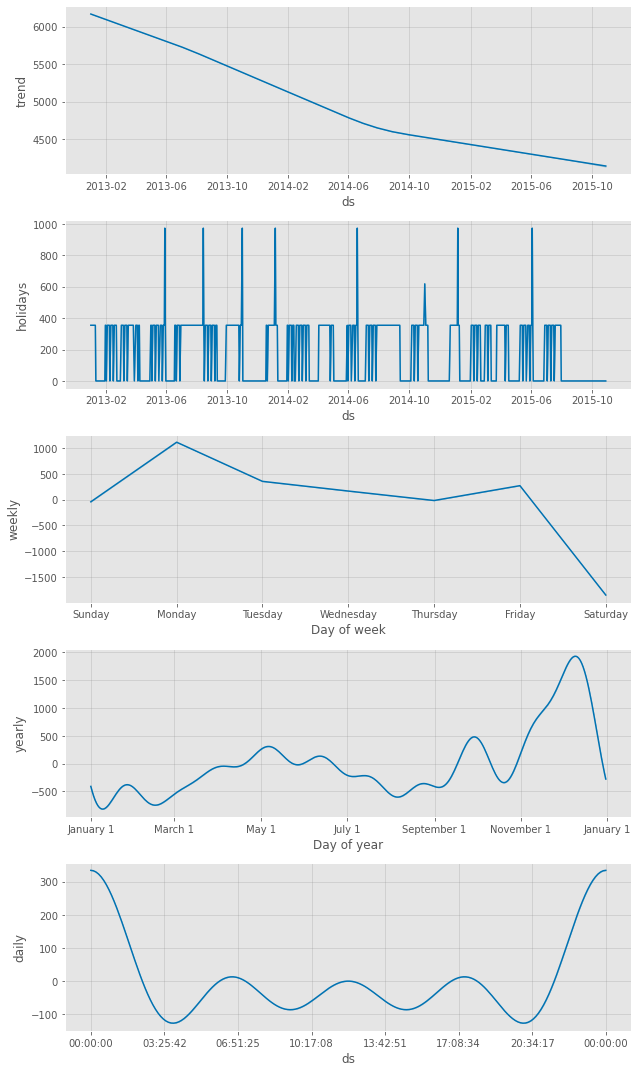

In [58]:
sales_predictions(6, sales_train_all_df, school_state_holidays, 90)

Ahora tenemos una gráfica extra.

* La gráfica holidays nos muestra cómo se comportan las ventas relacionado al día de vacaciones, algunos días las ventas son cero, es decir, la tienda cierra, otros días existen picos de ventas hasta más de $1000 euros.
